# Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

In [1045]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

In [1046]:
import warnings
warnings.filterwarnings('ignore')

In [1047]:
lead_df = pd.read_csv('Leads.csv')

In [1048]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1049]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1050]:
# Identify the Nulls
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [1051]:
# Encoding the variables with yes/ no to 1 and 0
cat_variable =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
               'Digital Advertisement', 'Through Recommendations','Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
               'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']

for var in cat_variable:
    lead_df[var] = lead_df[var].apply(lambda x:1 if x=='Yes' else 0)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [1052]:
# Check for Object columns
lead_df.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Prospect ID                                    9240 non-null   object
 1   Lead Origin                                    9240 non-null   object
 2   Lead Source                                    9204 non-null   object
 3   Last Activity                                  9137 non-null   object
 4   Country                                        6779 non-null   object
 5   Specialization                                 7802 non-null   object
 6   How did you hear about X Education             7033 non-null   object
 7   What is your current occupation                6550 non-null   object
 8   What matters most to you in choosing a course  6531 non-null   object
 9   Tags                                           5887 non-null   

In [1053]:
#Change the Select values to Null
lead_df = lead_df.replace('Select', np.nan)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,NaN,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,NaN,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [1054]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   int64  
 5   Do Not Call                                    9240 non-null   int64  
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Handle the missing values

In [1055]:
# Dropping columns having more than 70% null values
lead_df = lead_df.drop(lead_df.loc[:,list(round(lead_df.isnull().sum()/lead_df.shape[0], 2)>0.70)].columns,axis = 1)

In [1056]:
# Remove the Blank values in Lead Quality columns to NA
lead_df['Lead Quality'] = lead_df['Lead Quality'].replace(np.nan, 'NA')

In [1057]:
# remove the below columns as they are of no use 
lead_df = lead_df.drop(['Asymmetrique Activity Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Index', 'Asymmetrique Profile Score'], axis=1)

In [1058]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [1059]:
lead_df['Country'].value_counts().head()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
Name: count, dtype: int64

In [1060]:
lead_df['Specialization'].value_counts().head()

Specialization
Finance Management           976
Human Resource Management    848
Marketing Management         838
Operations Management        503
Business Administration      403
Name: count, dtype: int64

In [1061]:
lead_df['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [1062]:
lead_df['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [1063]:
# City has 39% of blank values. Lets check the city details
lead_df['City'].value_counts()

City
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [1064]:
# Replace the empty values to the mode value for all other than Specialization as all the values are almost equal in Specialization
lead_df['City'] = lead_df['City'].replace(np.nan, 'Mumbai')
lead_df['Specialization'] = lead_df['Specialization'].replace(np.nan, 'Other_Specialization' )
lead_df['Tags'] = lead_df['Tags'].replace(np.nan, 'Will revert after reading the email')
lead_df['What matters most to you in choosing a course'] = lead_df['What matters most to you in choosing a course'] .replace(np.nan, 'Better Career Prospects')
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(np.nan, 'Unemployed')
lead_df['Country'] = lead_df['Country'].replace(np.nan,'India')

In [1065]:
# Check for null values 
round(100*(lead_df.isnull().sum()/len(lead_df.index)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [1066]:
#Remaining null are <2 % and so can be dropped
lead_df.dropna(inplace=True)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,Interested in other courses,Low in Relevance,0,0,Mumbai,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,Ringing,NA,0,0,Mumbai,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,0,Modified


In [1067]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   int64  
 5   Do Not Call                                    9074 non-null   int64  
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 non-n

Step 4 - EDA 15.50

In [1068]:
# Checl the lead score without any model implementation
lead_df['Converted'].value_counts(normalize=True)

Converted
0    0.621446
1    0.378554
Name: proportion, dtype: float64

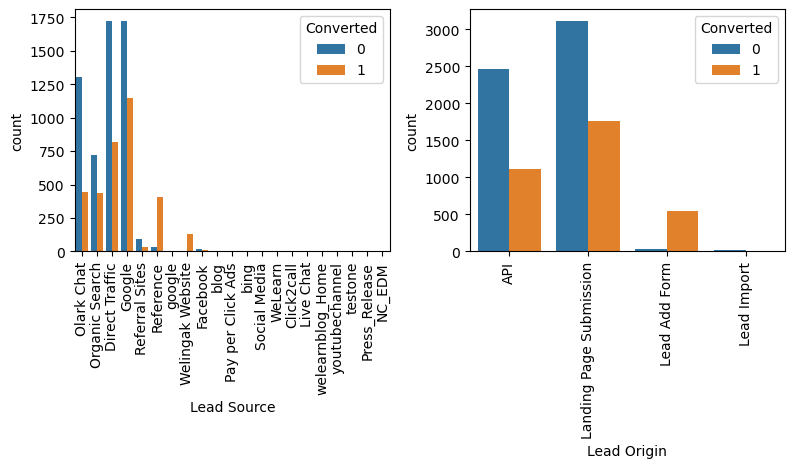

In [1069]:
fig=plt.subplots(figsize=(12,12))

for i, feature in enumerate(['Lead Source','Lead Origin']):
    plt.subplot(3,3,i+1)
    plt.subplots_adjust(hspace=2.0)
    sns.countplot(lead_df, x=feature, hue=lead_df['Converted'])
    plt.xticks(rotation=90)
    plt.tight_layout()

To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'API', 'Landing Page Submission' and 'Lead Add Form'

In [1070]:
# The count of leads from various sources are close to negligible and hence we can club them into 'Others' source for better visualisation and analysis

lead_df['Lead Source'] = lead_df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
                                                        'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other_Leads')

lead_df['Lead Source'] = lead_df['Lead Source'].replace('google','Google')

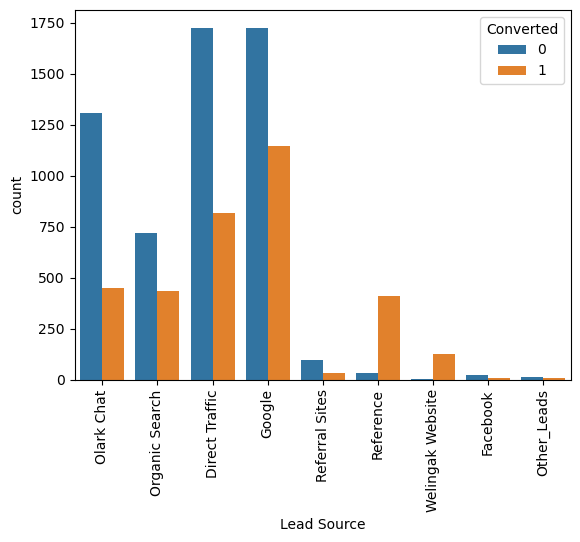

In [1071]:
sns.countplot(lead_df, x='Lead Source', hue=lead_df['Converted'])
plt.xticks(rotation='vertical')
plt.show()

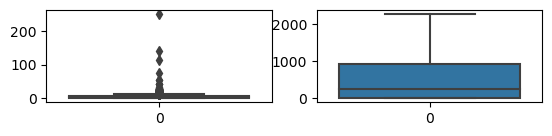

In [1072]:
# Check for outliers
for i, feature in enumerate(['TotalVisits', 'Total Time Spent on Website']):
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(hspace= 2.0)
    sns.boxplot(lead_df[feature])
    plt.tight_layout

There are lot of outliers in the Total visit and we will cap this to 95 percentile values

In [1073]:
q1 = lead_df['TotalVisits'].quantile(0.95)
lead_df['TotalVisits'][lead_df['TotalVisits']>q1]=q1

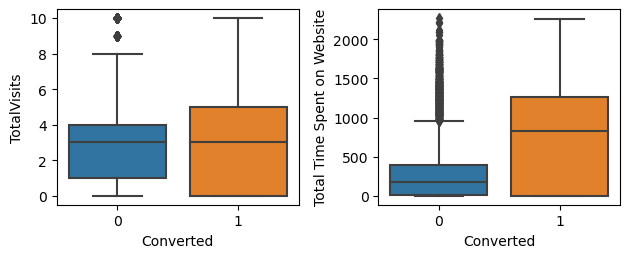

In [1074]:
for i, feature in enumerate(['TotalVisits', 'Total Time Spent on Website']):
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(hspace= 2.0)
    sns.boxplot(lead_df, x = 'Converted', y = feature)
    plt.tight_layout()

Meadian of both the conversion and non-conversion are same and hence not useful. 
Users spending more time on the website are more likely to be converted

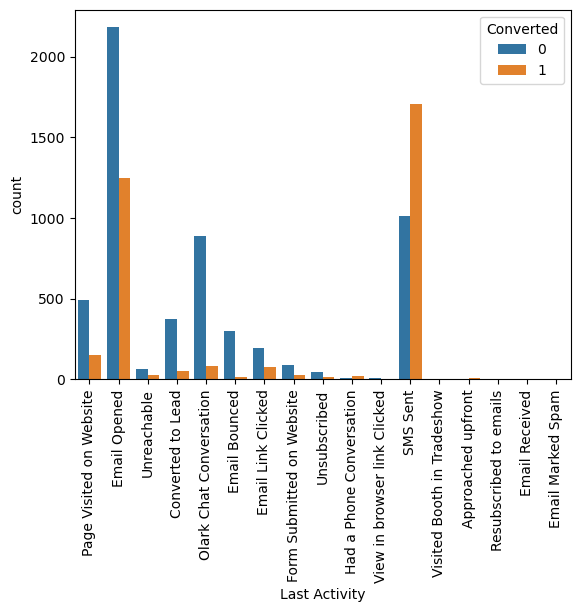

In [1075]:
sns.countplot(lead_df, x='Last Activity', hue = 'Converted')
plt.xticks(rotation='vertical')
plt.show()

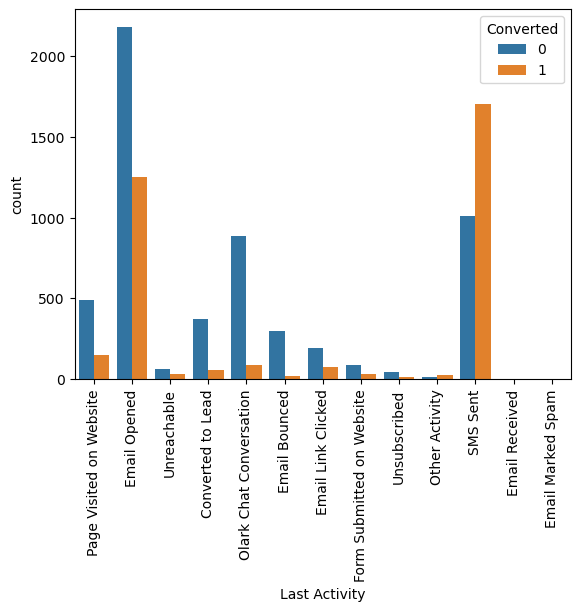

In [1076]:
#Convert all the low count categories to Others Category

lead_df['Last Activity'] = lead_df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                            'Visited Booth in Tradeshow', 'Approached upfront',
                                                            'Resubscribed to emails', 'Email Received' 'Email Marked Spam'],'Other Activity')

sns.countplot(lead_df, x='Last Activity', hue='Converted')
plt.xticks(rotation='vertical')
plt.show()

We should focus on increasing the conversion rate of those having last activity as Email Opnened and SMS Sent.

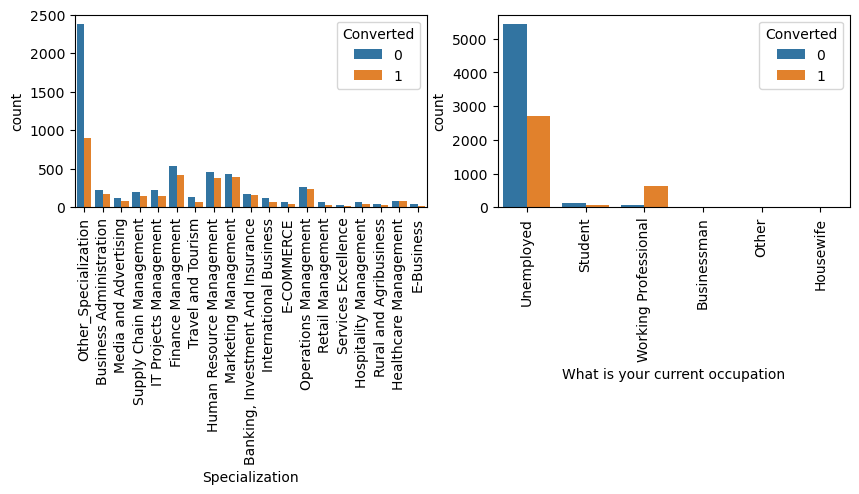

In [1077]:
fig=plt.subplots(figsize=(10,10))
for i, feature in enumerate(['Specialization', 'What is your current occupation']):
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(hspace= 2.0)
    sns.countplot(lead_df, x = feature, hue = 'Converted')
    plt.xticks(rotation='vertical')
    

22.54

In [1078]:
lead_df[['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations', 'Update me on Supply Chain Content','Update me on Supply Chain Content',
        'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']].describe()

,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Update me on Supply Chain Content,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9074.000000,9074.0,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.0,9074.0,9074.0,9074.0,9074.000000
mean,0.001543,0.0,0.000220,0.000110,0.000110,0.000441,0.000771,0.0,0.0,0.0,0.0,0.318272
std,0.039251,0.0,0.014845,0.010498,0.010498,0.020992,0.027766,0.0,0.0,0.0,0.0,0.465831
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000


Most of the values are 0 hence no inference can be made out of this

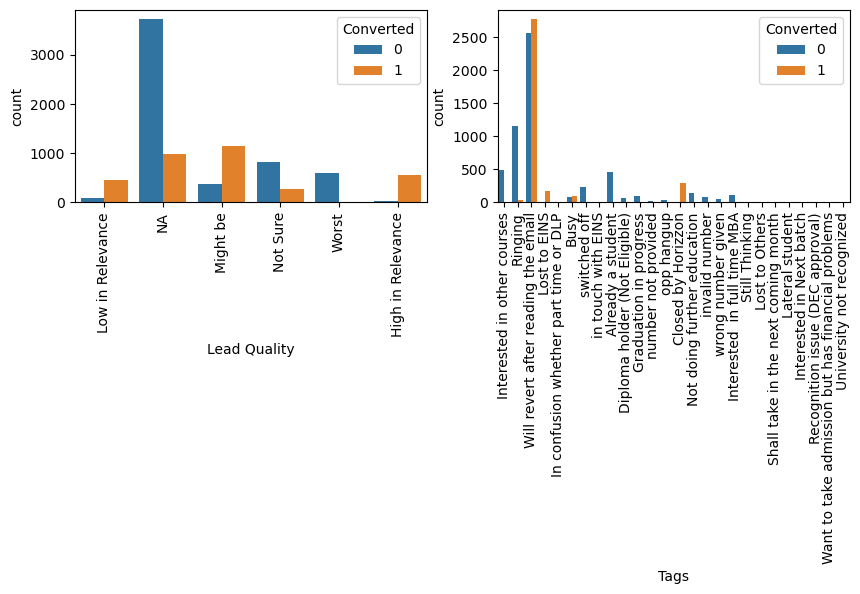

In [1079]:
fig=plt.subplots(figsize=(10,10))
for i, feature in enumerate(['Lead Quality', 'Tags']):
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(hspace= 2.0)
    sns.countplot(lead_df, x = feature, hue = 'Converted')
    plt.xticks(rotation='vertical')

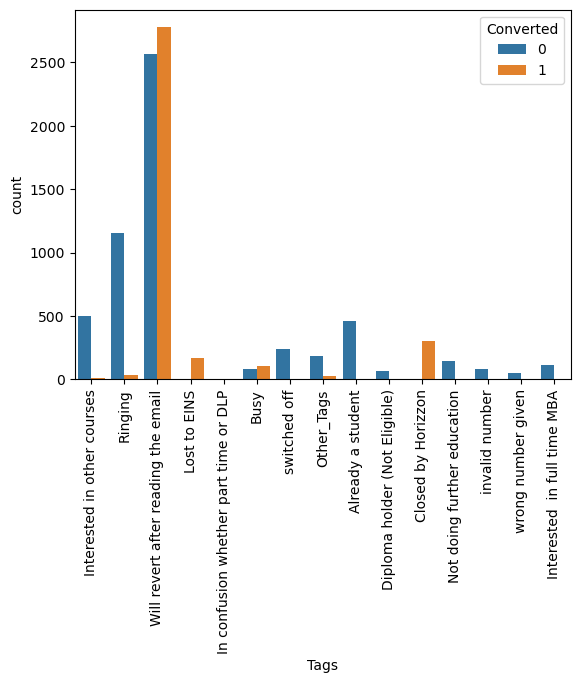

In [1080]:
# converting all the low count categories to Other category

lead_df['Tags'] = lead_df['Tags'].replace(['In confusion whetehr part time or DLP', 'in touch with EINS', 'Diplomo holder (Not Eligible)',
                                          'Approached upfront','Graduation in progress', 'number not provided', 'opp hangup', 'Still Thinking',
                                          'Lost to Others', 'Shall take in the next coming month', 'Lateral student', 'Interested in Next batch',
                                          'Recognition issue (DEC approval)', 'Want to take admission but has financial problems', 'University not recognized'], 'Other_Tags')

sns.countplot(lead_df, x='Tags', hue='Converted')
plt.xticks(rotation='vertical')
plt.show()

In [1081]:
# Dropping unnecessary columns
lead_df = lead_df.drop(['Prospect ID','Lead Number','What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article',
                       'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations','Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
                       'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Country','Do Not Call'], axis=1)

lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,NA,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


Step 5: Dummy variable creation

In [1082]:
dummy = pd.get_dummies(lead_df[['Lead Origin','Lead Source','Last Activity', 'Specialization', 'What is your current occupation',
                               'Tags','Lead Quality', 'City','Last Notable Activity']], drop_first=True, dtype='int')
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Leads,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [1083]:
lead_df = lead_df.drop(['Lead Origin','Lead Source','Last Activity', 'Specialization', 'What is your current occupation',
                               'Tags','Lead Quality', 'City','Last Notable Activity'],axis=1)
lead_df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0,0.0,0,0.0
1,0,0,5.0,674,2.5
2,0,1,2.0,1532,2.0
3,0,0,1.0,305,1.0
4,0,1,2.0,1428,1.0


In [1084]:
lead_df = pd.concat([lead_df, dummy],axis=1)
lead_df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [1085]:
X= lead_df.drop(['Converted'], axis=1)
y= lead_df['Converted']

print(y)
X.head()

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9074, dtype: int64


,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [1086]:
# Split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state = 100)

Step 7: Feature Scaling

In [1087]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,-0.432779,-0.160255,-0.179666,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,-0.432779,-0.540048,-0.179666,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,-1.150329,-0.888650,-1.132538,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4750,0,-0.432779,1.643304,-0.179666,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0.643547,2.017593,0.058552,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [1088]:
# Conversion rate
sum(lead_df['Converted'])/len(lead_df['Converted'].index)

0.3785541106458012

In [1089]:
converted_correl = lead_df.corr()

In [1090]:
converted_correl_unstacked = converted_correl.unstack().sort_values(kind='quicksort')
converted_correl.where(np.triu(np.ones(converted_correl.shape),k=1).astype(np.bool_)).stack().sort_values(ascending=False).head(10)

Last Activity_Email Marked Spam        Last Notable Activity_Email Marked Spam          1.000000
Lead Origin_Lead Import                Lead Source_Facebook                             0.983684
Last Activity_Unsubscribed             Last Notable Activity_Unsubscribed               0.872656
Lead Origin_Lead Add Form              Lead Source_Reference                            0.866191
Last Activity_Email Opened             Last Notable Activity_Email Opened               0.861636
Last Activity_SMS Sent                 Last Notable Activity_SMS Sent                   0.853102
Last Activity_Email Link Clicked       Last Notable Activity_Email Link Clicked         0.800686
TotalVisits                            Page Views Per Visit                             0.737996
Last Activity_Email Received           Last Notable Activity_Email Received             0.707068
Last Activity_Page Visited on Website  Last Notable Activity_Page Visited on Website    0.691811
dtype: float64

In [1091]:
# Dropping highly correalated features
X_test = X_test.drop(['Last Activity_Email Marked Spam','Lead Origin_Lead Import','Last Activity_Unsubscribed','Lead Origin_Lead Add Form','Last Activity_Email Opened',
                      'Last Activity_SMS Sent','Last Activity_Email Link Clicked','Page Views Per Visit','Last Notable Activity_Email Received','Last Notable Activity_Page Visited on Website'], axis=1)
X_train = X_train.drop(['Last Activity_Email Marked Spam','Lead Origin_Lead Import','Last Activity_Unsubscribed','Lead Origin_Lead Add Form','Last Activity_Email Opened',
                      'Last Activity_SMS Sent','Last Activity_Email Link Clicked','Page Views Per Visit','Last Notable Activity_Email Received','Last Notable Activity_Page Visited on Website'], axis=1)

In [1092]:
converted_correl = X_train.corr()
converted_correl.where(np.triu(np.ones(converted_correl.shape),k=1).astype(np.bool_)).stack().sort_values(ascending=False).head(10)

Last Activity_Other Activity                          Last Notable Activity_Had a Phone Conversation    0.631557
Do Not Email                                          Last Activity_Email Bounced                       0.624939
Last Activity_Unreachable                             Last Notable Activity_Unreachable                 0.607326
Lead Source_Olark Chat                                Specialization_Other_Specialization               0.505771
Last Activity_Email Bounced                           Last Notable Activity_Email Bounced               0.450911
TotalVisits                                           Lead Origin_Landing Page Submission               0.447765
Lead Source_Olark Chat                                Last Activity_Olark Chat Conversation             0.419173
Last Activity_Olark Chat Conversation                 Last Notable Activity_Olark Chat Conversation     0.406150
TotalVisits                                           Total Time Spent on Website               

In [1093]:
# Run model without any attribute filters
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6271
Model Family:                Binomial   Df Model:                           79
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1172.8
Date:                Tue, 31 Oct 2023   Deviance:                       2345.6
Time:                        12:26:01   Pearson chi2:                 1.26e+05
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6185
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6556      1.722      0.381      0.703      -2.719       4.030
Do Not Email                                            -1.1832      0.335     -3.535      0.000      -1.839      -0.527
TotalVisits                                              0.1096      0.077      1.427      0.154      -0.041       0.260
Total Time Spent on Website                              1.1378      0.065     17.376      0.000       1.009       1.266
Lead Origin_Landing Page Submission                     -1.1318      0.232     -4.888      0.000      -1.586      -0.678
Lead Source_Facebook                                     0.9201      0.879      1.046      0.295      -0.803       2.644
Lead Source_Google                                       0.1864      0.160      1.162      0.245      -0.128       0.501
Lead Source_Olark Chat                                   1.1905      0.235      5.073      0.000       0.731       1.650
Lead Source_Organic Search                              -0.0817      0.215     -0.380      0.704      -0.503       0.340
Lead Source_Other_Leads                                  0.7148      0.815      0.877      0.381      -0.883       2.313
Lead Source_Reference                                    1.7777      0.523      3.401      0.001       0.753       2.802
Lead Source_Referral Sites                              -0.1086      0.495     -0.220      0.826      -1.078       0.861
Lead Source_Welingak Website                             5.5677      0.771      7.226      0.000       4.057       7.078
Last Activity_Email Bounced                             -0.9278      0.816     -1.138      0.255      -2.526       0.671
Last Activity_Email Received                            21.2639   1.52e+05      0.000      1.000   -2.98e+05    2.99e+05
Last Activity_Form Submitted on Website                 -0.7686      0.540     -1.424      0.154      -1.826       0.289
Last Activity_Olark Chat Conversation                   -1.1354      0.276     -4.118      0.000      -1.676      -0.595
Last Activity_Other Activity                             1.1786      1.175      1.003      0.316      -1.124       3.481
Last Activity_Page Visited on Website                   -0.2287      0.378     -0.605      0.545      -0.970       0.512
Last Activity_Unreachable                               -0.1630      0.838     -0.194      0.846      -1.806       1.480
Specialization_Business Administration                  -0.3728      0.413     -0.904      0.366      -1.181       0.436
Specialization_E-Business                               -0.3369      0.760     -0.443      0.658      -1.827       1.153
Specialization_E-COMMERCE                                0

Model Building using Stats Model and RFE

In [1094]:
log_reg = LogisticRegression()
rfe = RFE(log_reg, step = 15)
rfe = rfe.fit(X_train,y_train)

In [1095]:
rfe.support_

array([ True, False,  True,  True, False, False,  True, False, False,
        True, False,  True,  True, False,  True,  True,  True, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False, False,  True,  True,  True, False, False,
       False, False, False,  True,  True, False, False, False, False,
        True,  True, False,  True,  True,  True, False])

In [1096]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Source_Facebook', False, 2),
 ('Lead Source_Google', False, 3),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 3),
 ('Lead Source_Other_Leads', False, 2),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 3),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Received', False, 4),
 ('Last Activity_Form Submitted on Website', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 2),
 ('Last Activity_Unreachable', False, 4),
 ('Specialization_Business Administration', False, 3),
 ('Specialization_E-Business', False, 4),
 ('Specialization_E-COMMERCE', True, 1),
 ('Specialization_Finance Management', False, 2),
 ('Specia

In [1097]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other Activity',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Other_Specialization',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid

In [1098]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Other_Leads',
       'Lead Source_Referral Sites', 'Last Activity_Email Received',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'What is your current occupation_Housewife',
       'What is your current 

In [1099]:
# Building the model #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6311
Model Family:                Binomial   Df Model:                           39
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1190.1
Date:                Tue, 31 Oct 2023   Deviance:                       2380.2
Time:                        12:26:02   Pearson chi2:                 1.07e+05
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6164
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0346      0.948      0.036      0.971      -1.824       1.893
Do Not Email                                            -1.2472      0.329     -3.792      0.000      -1.892      -0.602
Total Time Spent on Website                              1.1273      0.064     17.673      0.000       1.002       1.252
Lead Origin_Landing Page Submission                     -1.2283      0.218     -5.639      0.000      -1.655      -0.801
Lead Source_Olark Chat                                   0.9533      0.171      5.584      0.000       0.619       1.288
Lead Source_Reference                                    1.6674      0.489      3.413      0.001       0.710       2.625
Lead Source_Welingak Website                             5.3526      0.757      7.074      0.000       3.870       6.836
Last Activity_Email Bounced                             -0.7519      0.781     -0.963      0.335      -2.282       0.778
Last Activity_Form Submitted on Website                 -0.7165      0.527     -1.360      0.174      -1.749       0.316
Last Activity_Olark Chat Conversation                   -1.0874      0.272     -3.997      0.000      -1.621      -0.554
Last Activity_Other Activity                             1.0039      0.879      1.142      0.253      -0.719       2.727
Specialization_E-COMMERCE                                0.9588      0.518      1.852      0.064      -0.056       1.974
Specialization_International Business                   -0.4954      0.384     -1.289      0.197      -1.249       0.258
Specialization_Other_Specialization                     -0.5132      0.212     -2.423      0.015      -0.928      -0.098
Specialization_Travel and Tourism                       -0.6032      0.445     -1.356      0.175      -1.475       0.268
What is your current occupation_Student                 -0.9971      1.053     -0.947      0.344      -3.061       1.067
What is your current occupation_Unemployed              -1.1865      0.906     -1.309      0.191      -2.963       0.590
What is your current occupation_Working Professional    -0.1531      0.968     -0.158      0.874      -2.050       1.744
Tags_Busy                                                1.5648      0.401      3.902      0.000       0.779       2.351
Tags_Closed by Horizzon                                  8.9993      0.853     10.545      0.000       7.327      10.672
Tags_Diploma holder (Not Eligible)                      -0.7881      1.152     -0.684      0.494      -3.045       1.469
Tags_Interested  in full time MBA                       -0.6016      0.895     -0.672      0.501      -2.356       1.152
Tags_Interested in other courses                        -0

In [1100]:
y_train_pred = res.predict(X_train_sm)
y_train_pred.head()

3009    0.118150
1012    0.080366
9226    0.004783
4750    0.900617
7987    0.999815
dtype: float64

In [1101]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert Prob': y_train_pred})
y_train_pred_final['Pros_ID'] = y_train.index
y_train_pred_final.head()

,Convert,Convert Prob,Pros_ID
3009,0,0.118150,3009
1012,0,0.080366,1012
9226,0,0.004783,9226
4750,1,0.900617,4750
7987,1,0.999815,7987


In [1102]:
y_train_pred_final['Predicted'] = y_train_pred_final['Convert Prob'].map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Convert,Convert Prob,Pros_ID,Predicted
3009,0,0.118150,3009,0
1012,0,0.080366,1012,0
9226,0,0.004783,9226,0
4750,1,0.900617,4750,1
7987,1,0.999815,7987,1


In [1103]:
metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.Predicted)

0.9304046606833569

In [1104]:
def calculate_vif(X_train):
    vif_df = pd.DataFrame()
    vif_df['Features'] = X_train.columns
    vif_df['Variance Inflation Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif_df['Variance Inflation Factor'] = round(vif_df['Variance Inflation Factor'],2)
    vif_df = vif_df.sort_values(by = 'Variance Inflation Factor', ascending= False)
    print(vif_df)

calculate_vif(X_train[col])
    

                                             Features  \
15         What is your current occupation_Unemployed   
25           Tags_Will revert after reading the email   
2                 Lead Origin_Landing Page Submission   
12                Specialization_Other_Specialization   
29                                    Lead Quality_NA   
24                                       Tags_Ringing   
16  What is your current occupation_Working Profes...   
34                     Last Notable Activity_Modified   
3                              Lead Source_Olark Chat   
6                         Last Activity_Email Bounced   
0                                        Do Not Email   
8               Last Activity_Olark Chat Conversation   
36                     Last Notable Activity_SMS Sent   
31                                 Lead Quality_Worst   
21                   Tags_Interested in other courses   
30                              Lead Quality_Not Sure   
18                            T

In [1105]:
col = col.drop('What is your current occupation_Unemployed')

In [1106]:
# Building the model #3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6312
Model Family:                Binomial   Df Model:                           38
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1191.0
Date:                Tue, 31 Oct 2023   Deviance:                       2382.0
Time:                        12:26:02   Pearson chi2:                 1.08e+05
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6163
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1049      0.374     -2.958      0.003      -1.837      -0.373
Do Not Email                                            -1.2502      0.329     -3.800      0.000      -1.895      -0.605
Total Time Spent on Website                              1.1265      0.064     17.670      0.000       1.002       1.251
Lead Origin_Landing Page Submission                     -1.2482      0.218     -5.728      0.000      -1.675      -0.821
Lead Source_Olark Chat                                   0.9470      0.171      5.550      0.000       0.613       1.281
Lead Source_Reference                                    1.6585      0.488      3.400      0.001       0.703       2.615
Lead Source_Welingak Website                             5.3471      0.757      7.067      0.000       3.864       6.830
Last Activity_Email Bounced                             -0.7544      0.781     -0.966      0.334      -2.285       0.776
Last Activity_Form Submitted on Website                 -0.7125      0.530     -1.344      0.179      -1.751       0.326
Last Activity_Olark Chat Conversation                   -1.0926      0.272     -4.015      0.000      -1.626      -0.559
Last Activity_Other Activity                             0.9892      0.879      1.126      0.260      -0.733       2.711
Specialization_E-COMMERCE                                0.9538      0.518      1.842      0.065      -0.061       1.969
Specialization_International Business                   -0.5036      0.384     -1.310      0.190      -1.257       0.250
Specialization_Other_Specialization                     -0.5336      0.212     -2.517      0.012      -0.949      -0.118
Specialization_Travel and Tourism                       -0.6110      0.445     -1.374      0.170      -1.483       0.261
What is your current occupation_Student                  0.1819      0.542      0.335      0.737      -0.881       1.245
What is your current occupation_Working Professional     1.0207      0.361      2.830      0.005       0.314       1.728
Tags_Busy                                                1.5302      0.399      3.837      0.000       0.749       2.312
Tags_Closed by Horizzon                                  8.9803      0.853     10.531      0.000       7.309      10.652
Tags_Diploma holder (Not Eligible)                      -0.8172      1.151     -0.710      0.478      -3.073       1.439
Tags_Interested  in full time MBA                       -0.6381      0.894     -0.714      0.475      -2.390       1.114
Tags_Interested in other courses                        -0.5704      0.471     -1.210      0.226      -1.494       0.353
Tags_Lost to EINS                                        9

In [1107]:
col = col.drop(['Tags_invalid number','Tags_wrong number given'])

In [1108]:
# Building the model #4

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6314
Model Family:                Binomial   Df Model:                           36
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1199.7
Date:                Tue, 31 Oct 2023   Deviance:                       2399.5
Time:                        12:26:03   Pearson chi2:                 1.02e+05
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6153
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6026      0.370     -4.332      0.000      -2.328      -0.877
Do Not Email                                            -1.2346      0.327     -3.773      0.000      -1.876      -0.593
Total Time Spent on Website                              1.1236      0.063     17.710      0.000       0.999       1.248
Lead Origin_Landing Page Submission                     -1.2781      0.219     -5.843      0.000      -1.707      -0.849
Lead Source_Olark Chat                                   0.9423      0.170      5.533      0.000       0.609       1.276
Lead Source_Reference                                    1.7296      0.491      3.521      0.000       0.767       2.693
Lead Source_Welingak Website                             5.3322      0.756      7.057      0.000       3.851       6.813
Last Activity_Email Bounced                             -0.7638      0.779     -0.981      0.327      -2.290       0.763
Last Activity_Form Submitted on Website                 -0.7095      0.532     -1.334      0.182      -1.752       0.333
Last Activity_Olark Chat Conversation                   -1.0941      0.272     -4.024      0.000      -1.627      -0.561
Last Activity_Other Activity                             1.0153      0.879      1.155      0.248      -0.707       2.738
Specialization_E-COMMERCE                                0.7934      0.514      1.544      0.123      -0.214       1.800
Specialization_International Business                   -0.4960      0.385     -1.288      0.198      -1.251       0.259
Specialization_Other_Specialization                     -0.5613      0.213     -2.641      0.008      -0.978      -0.145
Specialization_Travel and Tourism                       -0.6487      0.438     -1.481      0.139      -1.507       0.210
What is your current occupation_Student                  0.2614      0.552      0.474      0.636      -0.821       1.343
What is your current occupation_Working Professional     1.0441      0.365      2.864      0.004       0.329       1.759
Tags_Busy                                                2.0848      0.387      5.381      0.000       1.325       2.844
Tags_Closed by Horizzon                                  9.4669      0.852     11.113      0.000       7.797      11.137
Tags_Diploma holder (Not Eligible)                      -0.3163      1.143     -0.277      0.782      -2.557       1.925
Tags_Interested  in full time MBA                       -0.1485      0.895     -0.166      0.868      -1.903       1.606
Tags_Interested in other courses                        -0.0597      0.465     -0.128      0.898      -0.972       0.853
Tags_Lost to EINS                                       10

In [1109]:
col = col.drop('Tags_Not doing further education')

In [1110]:
# Building the model #5

X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6315
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1199.8
Date:                Tue, 31 Oct 2023   Deviance:                       2399.6
Time:                        12:26:03   Pearson chi2:                 1.02e+05
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6153
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6271      0.364     -4.476      0.000      -2.340      -0.915
Do Not Email                                            -1.2333      0.327     -3.769      0.000      -1.875      -0.592
Total Time Spent on Website                              1.1242      0.063     17.721      0.000       1.000       1.249
Lead Origin_Landing Page Submission                     -1.2778      0.219     -5.844      0.000      -1.706      -0.849
Lead Source_Olark Chat                                   0.9427      0.170      5.535      0.000       0.609       1.277
Lead Source_Reference                                    1.7160      0.489      3.513      0.000       0.759       2.673
Lead Source_Welingak Website                             5.3329      0.756      7.058      0.000       3.852       6.814
Last Activity_Email Bounced                             -0.7662      0.779     -0.984      0.325      -2.292       0.760
Last Activity_Form Submitted on Website                 -0.7097      0.532     -1.334      0.182      -1.752       0.333
Last Activity_Olark Chat Conversation                   -1.0943      0.272     -4.025      0.000      -1.627      -0.561
Last Activity_Other Activity                             1.0188      0.880      1.158      0.247      -0.706       2.743
Specialization_E-COMMERCE                                0.7952      0.514      1.548      0.122      -0.212       1.802
Specialization_International Business                   -0.4951      0.385     -1.285      0.199      -1.250       0.260
Specialization_Other_Specialization                     -0.5604      0.212     -2.637      0.008      -0.977      -0.144
Specialization_Travel and Tourism                       -0.6482      0.438     -1.479      0.139      -1.507       0.211
What is your current occupation_Student                  0.2648      0.553      0.479      0.632      -0.818       1.348
What is your current occupation_Working Professional     1.0362      0.364      2.850      0.004       0.324       1.749
Tags_Busy                                                2.1073      0.382      5.510      0.000       1.358       2.857
Tags_Closed by Horizzon                                  9.4935      0.849     11.187      0.000       7.830      11.157
Tags_Diploma holder (Not Eligible)                      -0.2913      1.142     -0.255      0.799      -2.529       1.946
Tags_Interested  in full time MBA                       -0.1249      0.893     -0.140      0.889      -1.876       1.626
Tags_Interested in other courses                        -0.0346      0.460     -0.075      0.940      -0.937       0.868
Tags_Lost to EINS                                       10

In [1111]:
calculate_vif(X_train[col])

                                             Features  \
23           Tags_Will revert after reading the email   
2                 Lead Origin_Landing Page Submission   
12                Specialization_Other_Specialization   
25                                    Lead Quality_NA   
30                     Last Notable Activity_Modified   
3                              Lead Source_Olark Chat   
6                         Last Activity_Email Bounced   
22                                       Tags_Ringing   
0                                        Do Not Email   
8               Last Activity_Olark Chat Conversation   
32                     Last Notable Activity_SMS Sent   
26                              Lead Quality_Not Sure   
4                               Lead Source_Reference   
27                                 Lead Quality_Worst   
1                         Total Time Spent on Website   
17                            Tags_Closed by Horizzon   
20                   Tags_Inter

In [1112]:
col = col.drop('Lead Quality_Not Sure')

In [1113]:
calculate_vif(X_train[col])

                                             Features  \
23           Tags_Will revert after reading the email   
2                 Lead Origin_Landing Page Submission   
12                Specialization_Other_Specialization   
25                                    Lead Quality_NA   
29                     Last Notable Activity_Modified   
3                              Lead Source_Olark Chat   
6                         Last Activity_Email Bounced   
0                                        Do Not Email   
8               Last Activity_Olark Chat Conversation   
22                                       Tags_Ringing   
31                     Last Notable Activity_SMS Sent   
4                               Lead Source_Reference   
26                                 Lead Quality_Worst   
1                         Total Time Spent on Website   
17                            Tags_Closed by Horizzon   
30      Last Notable Activity_Olark Chat Conversation   
20                   Tags_Inter

In [1114]:
col = col.drop('Tags_Will revert after reading the email')

In [1115]:
calculate_vif(X_train[col])

                                             Features  \
12                Specialization_Other_Specialization   
2                 Lead Origin_Landing Page Submission   
24                                    Lead Quality_NA   
28                     Last Notable Activity_Modified   
6                         Last Activity_Email Bounced   
3                              Lead Source_Olark Chat   
0                                        Do Not Email   
8               Last Activity_Olark Chat Conversation   
30                     Last Notable Activity_SMS Sent   
4                               Lead Source_Reference   
25                                 Lead Quality_Worst   
1                         Total Time Spent on Website   
29      Last Notable Activity_Olark Chat Conversation   
26                Last Notable Activity_Email Bounced   
22                                       Tags_Ringing   
15  What is your current occupation_Working Profes...   
17                            T

In [1116]:
# Building the model #6

X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6317
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1430.1
Date:                Tue, 31 Oct 2023   Deviance:                       2860.3
Time:                        12:26:04   Pearson chi2:                 5.30e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5863
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.9410      0.196      9.891      0.000       1.556       2.326
Do Not Email                                            -1.5961      0.304     -5.249      0.000      -2.192      -1.000
Total Time Spent on Website                              1.1320      0.057     19.690      0.000       1.019       1.245
Lead Origin_Landing Page Submission                     -1.1735      0.185     -6.336      0.000      -1.536      -0.810
Lead Source_Olark Chat                                   1.0247      0.160      6.419      0.000       0.712       1.338
Lead Source_Reference                                    2.1319      0.418      5.100      0.000       1.313       2.951
Lead Source_Welingak Website                             5.6414      0.765      7.377      0.000       4.143       7.140
Last Activity_Email Bounced                             -1.0208      0.784     -1.302      0.193      -2.557       0.515
Last Activity_Form Submitted on Website                 -0.6894      0.469     -1.470      0.141      -1.608       0.230
Last Activity_Olark Chat Conversation                   -1.1570      0.253     -4.568      0.000      -1.653      -0.661
Last Activity_Other Activity                             0.7817      0.691      1.131      0.258      -0.573       2.136
Specialization_E-COMMERCE                                0.6938      0.479      1.450      0.147      -0.244       1.632
Specialization_International Business                   -0.4283      0.322     -1.331      0.183      -1.059       0.202
Specialization_Other_Specialization                     -0.4879      0.183     -2.672      0.008      -0.846      -0.130
Specialization_Travel and Tourism                       -0.4512      0.373     -1.209      0.227      -1.182       0.280
What is your current occupation_Student                  0.4976      0.410      1.213      0.225      -0.306       1.302
What is your current occupation_Working Professional     1.5610      0.295      5.293      0.000       0.983       2.139
Tags_Busy                                               -1.7676      0.263     -6.722      0.000      -2.283      -1.252
Tags_Closed by Horizzon                                  4.9313      0.779      6.327      0.000       3.404       6.459
Tags_Diploma holder (Not Eligible)                      -3.9971      1.100     -3.633      0.000      -6.154      -1.841
Tags_Interested  in full time MBA                       -4.0820      0.844     -4.835      0.000      -5.737      -2.427
Tags_Interested in other courses                        -3.9115      0.377    -10.376      0.000      -4.650      -3.173
Tags_Lost to EINS                                        6

In [1117]:
# Building the model #7

X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6317
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1430.1
Date:                Tue, 31 Oct 2023   Deviance:                       2860.3
Time:                        12:26:04   Pearson chi2:                 5.30e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5863
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.9410      0.196      9.891      0.000       1.556       2.326
Do Not Email                                            -1.5961      0.304     -5.249      0.000      -2.192      -1.000
Total Time Spent on Website                              1.1320      0.057     19.690      0.000       1.019       1.245
Lead Origin_Landing Page Submission                     -1.1735      0.185     -6.336      0.000      -1.536      -0.810
Lead Source_Olark Chat                                   1.0247      0.160      6.419      0.000       0.712       1.338
Lead Source_Reference                                    2.1319      0.418      5.100      0.000       1.313       2.951
Lead Source_Welingak Website                             5.6414      0.765      7.377      0.000       4.143       7.140
Last Activity_Email Bounced                             -1.0208      0.784     -1.302      0.193      -2.557       0.515
Last Activity_Form Submitted on Website                 -0.6894      0.469     -1.470      0.141      -1.608       0.230
Last Activity_Olark Chat Conversation                   -1.1570      0.253     -4.568      0.000      -1.653      -0.661
Last Activity_Other Activity                             0.7817      0.691      1.131      0.258      -0.573       2.136
Specialization_E-COMMERCE                                0.6938      0.479      1.450      0.147      -0.244       1.632
Specialization_International Business                   -0.4283      0.322     -1.331      0.183      -1.059       0.202
Specialization_Other_Specialization                     -0.4879      0.183     -2.672      0.008      -0.846      -0.130
Specialization_Travel and Tourism                       -0.4512      0.373     -1.209      0.227      -1.182       0.280
What is your current occupation_Student                  0.4976      0.410      1.213      0.225      -0.306       1.302
What is your current occupation_Working Professional     1.5610      0.295      5.293      0.000       0.983       2.139
Tags_Busy                                               -1.7676      0.263     -6.722      0.000      -2.283      -1.252
Tags_Closed by Horizzon                                  4.9313      0.779      6.327      0.000       3.404       6.459
Tags_Diploma holder (Not Eligible)                      -3.9971      1.100     -3.633      0.000      -6.154      -1.841
Tags_Interested  in full time MBA                       -4.0820      0.844     -4.835      0.000      -5.737      -2.427
Tags_Interested in other courses                        -3.9115      0.377    -10.376      0.000      -4.650      -3.173
Tags_Lost to EINS                                        6

In [1118]:
col = col.drop(['Specialization_E-COMMERCE','Last Activity_Other Activity','Specialization_Travel and Tourism','Last Notable Activity_Email Bounced','Last Activity_Email Bounced'])

In [1119]:
# Building the model #8

X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6322
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1433.7
Date:                Tue, 31 Oct 2023   Deviance:                       2867.4
Time:                        12:26:04   Pearson chi2:                 3.55e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5859
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.9568      0.195     10.028      0.000       1.574       2.339
Do Not Email                                            -1.7719      0.249     -7.111      0.000      -2.260      -1.284
Total Time Spent on Website                              1.1280      0.057     19.755      0.000       1.016       1.240
Lead Origin_Landing Page Submission                     -1.1810      0.185     -6.392      0.000      -1.543      -0.819
Lead Source_Olark Chat                                   1.0093      0.159      6.336      0.000       0.697       1.322
Lead Source_Reference                                    2.1373      0.418      5.115      0.000       1.318       2.956
Lead Source_Welingak Website                             5.6874      0.770      7.387      0.000       4.178       7.196
Last Activity_Form Submitted on Website                 -0.6958      0.471     -1.478      0.139      -1.618       0.227
Last Activity_Olark Chat Conversation                   -1.1379      0.253     -4.502      0.000      -1.633      -0.643
Specialization_International Business                   -0.4233      0.321     -1.317      0.188      -1.053       0.207
Specialization_Other_Specialization                     -0.4937      0.182     -2.710      0.007      -0.851      -0.137
What is your current occupation_Student                  0.4672      0.408      1.144      0.253      -0.333       1.268
What is your current occupation_Working Professional     1.5685      0.297      5.289      0.000       0.987       2.150
Tags_Busy                                               -1.7719      0.262     -6.752      0.000      -2.286      -1.258
Tags_Closed by Horizzon                                  4.9400      0.778      6.346      0.000       3.414       6.466
Tags_Diploma holder (Not Eligible)                      -3.9551      1.092     -3.622      0.000      -6.095      -1.815
Tags_Interested  in full time MBA                       -4.1101      0.839     -4.900      0.000      -5.754      -2.466
Tags_Interested in other courses                        -3.9076      0.377    -10.367      0.000      -4.646      -3.169
Tags_Lost to EINS                                        6.1803      0.816      7.578      0.000       4.582       7.779
Tags_Ringing                                            -5.7931      0.283    -20.452      0.000      -6.348      -5.238
Tags_switched off                                       -5.8000      0.573    -10.131      0.000      -6.922      -4.678
Lead Quality_NA                                         -2.6742      0.122    -21.987      0.000      -2.913      -2.436
Lead Quality_Worst                                      -5

In [1120]:
calculate_vif(X_train[col])

                                             Features  \
9                 Specialization_Other_Specialization   
2                 Lead Origin_Landing Page Submission   
20                                    Lead Quality_NA   
23                     Last Notable Activity_Modified   
3                              Lead Source_Olark Chat   
7               Last Activity_Olark Chat Conversation   
25                     Last Notable Activity_SMS Sent   
4                               Lead Source_Reference   
1                         Total Time Spent on Website   
21                                 Lead Quality_Worst   
24      Last Notable Activity_Olark Chat Conversation   
18                                       Tags_Ringing   
0                                        Do Not Email   
11  What is your current occupation_Working Profes...   
13                            Tags_Closed by Horizzon   
16                   Tags_Interested in other courses   
5                        Lead S

In [1121]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.Predicted )
print(confusion)

[[3739  166]
 [ 276 2170]]


In [1122]:
#Accuracy
metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.Predicted)

0.9304046606833569

In [1123]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1124]:
#Sensitivity
TP / float(TP+FN)

0.8871627146361406

In [1125]:
#specificity
TN / float(TN+FP)

0.9574903969270167

In [1126]:
# False Postive Rate - predicting conversion when customer does not have convert
(FP/ float(TN+FP))


0.042509603072983355

In [1127]:
# positive predictive value 
TP / float(TP+FP)

0.9289383561643836

In [1128]:
# Negative predictive value
TN / float(TN+ FN)

0.9312577833125778

In [1129]:
# Plotting ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1130]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final['Convert Prob'], drop_intermediate = False )

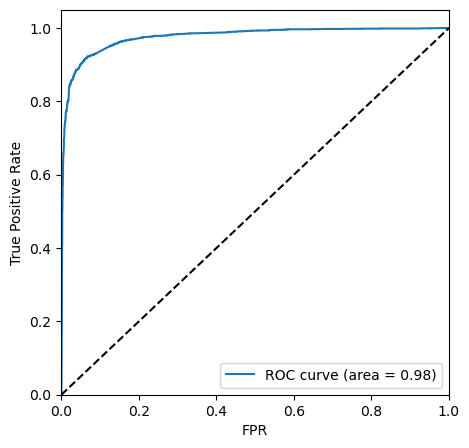

In [1131]:
draw_roc(y_train_pred_final.Convert, y_train_pred_final['Convert Prob'])

ROC of 0.97 is an indication of good model

# Finding Cut off point

In [1132]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Convert Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Convert,Convert Prob,Pros_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3009,0,0.118150,3009,0,1,1,0,0,0,0,0,0,0,0
1012,0,0.080366,1012,0,1,0,0,0,0,0,0,0,0,0
9226,0,0.004783,9226,0,1,0,0,0,0,0,0,0,0,0
4750,1,0.900617,4750,1,1,1,1,1,1,1,1,1,1,1
7987,1,0.999815,7987,1,1,1,1,1,1,1,1,1,1,1


In [1133]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.847268  0.977105  0.765941
0.2   0.2  0.899228  0.955437  0.864020
0.3   0.3  0.925681  0.923549  0.927017
0.4   0.4  0.930090  0.908831  0.943406
0.5   0.5  0.930405  0.887163  0.957490
0.6   0.6  0.929775  0.867130  0.969014
0.7   0.7  0.926311  0.842191  0.979001
0.8   0.8  0.907101  0.781684  0.985659
0.9   0.9  0.888049  0.721586  0.992318


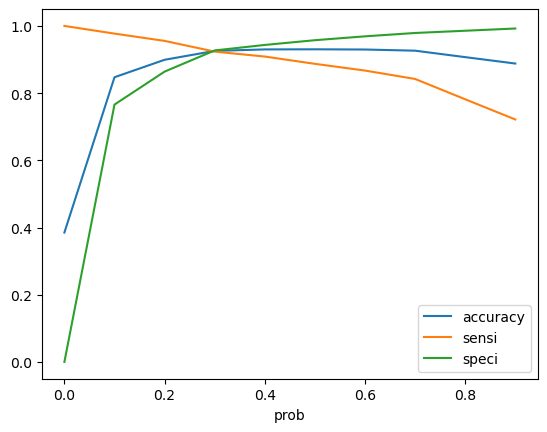

In [1134]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [1135]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final['Convert Prob'].map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Convert,Convert Prob,Pros_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
3009,0,0.118150,3009,0,1,1,0,0,0,0,0,0,0,0,0
1012,0,0.080366,1012,0,1,0,0,0,0,0,0,0,0,0,0
9226,0,0.004783,9226,0,1,0,0,0,0,0,0,0,0,0,0
4750,1,0.900617,4750,1,1,1,1,1,1,1,1,1,1,1,1
7987,1,0.999815,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [1136]:
y_train_pred_final['Lead_Score'] = y_train_pred_final['Convert Prob'].map( lambda x: round(x*100))

y_train_pred_final[['Convert','Convert Prob','final_Predicted','Lead_Score']].head()

,Convert,Convert Prob,final_Predicted,Lead_Score
3009,0,0.118150,0,12
1012,0,0.080366,0,8
9226,0,0.004783,0,0
4750,1,0.900617,1,90
7987,1,0.999815,1,100


In [1137]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.final_Predicted)

0.9256809951188789

In [1138]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.final_Predicted )
confusion2

array([[3620,  285],
       [ 187, 2259]], dtype=int64)

In [1139]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1140]:
# Sensitivity
TP / float(TP+FN)

0.9235486508585445

In [1141]:
# Calculate specificity
TN / float(TN+FP)

0.9270166453265045

In [1142]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
FP/ float(TN+FP)

0.07298335467349552

In [1143]:
# Positive predictive value 
TP / float(TP+FP)

0.8879716981132075

In [1144]:
# Negative predictive value
TN / float(TN+ FN)

0.9508799579721565

In [1145]:
# Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9289383561643836

In [1146]:
precision_score(y_train_pred_final.Convert, y_train_pred_final.final_Predicted)

0.8879716981132075

PREDICTIONS ON TEST SET

In [1147]:
X_test = X_test[col]

In [1148]:
X_test.columns

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Specialization_International Business',
       'Specialization_Other_Specialization',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_switched off',
       'Lead Quality_NA', 'Lead Quality_Worst',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
 

In [1149]:
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Specialization_International Business,Specialization_Other_Specialization,...,Tags_Ringing,Tags_switched off,Lead Quality_NA,Lead Quality_Worst,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3271,0,157,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1490,0,1513,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7936,0,74,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4216,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3830,0,164,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [1150]:
X_test[['Total Time Spent on Website']]= scaler.fit_transform(X_test[['Total Time Spent on Website']])
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Specialization_International Business,Specialization_Other_Specialization,...,Tags_Ringing,Tags_switched off,Lead Quality_NA,Lead Quality_Worst,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3271,0,-0.591008,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1490,0,1.894051,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7936,0,-0.743117,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4216,0,-0.878732,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3830,0,-0.578179,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [1151]:
X_test_sm = sm.add_constant(X_test)

In [1152]:
y_test_pred = res.predict(X_test_sm)

In [1153]:
y_test_pred[:10]

3271    0.132656
1490    0.988802
7936    0.114128
4216    0.999540
3830    0.072389
1800    0.819095
6507    0.023775
4821    0.000689
4223    0.990397
4714    0.117306
dtype: float64

In [1154]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
3271,0.132656
1490,0.988802
7936,0.114128
4216,0.999540
3830,0.072389


In [1155]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
3271,0
1490,1
7936,0
4216,1
3830,0


In [1156]:
y_test_df['Pros_ID'] = y_test_df.index

In [1157]:
#Remove index for both df to append them side by side
y_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1158]:
y_pred_final = pd.concat([y_test_df, y_pred],axis=1)
y_pred_final.head()

,Converted,Pros_ID,0
0,0,3271,0.132656
1,1,1490,0.988802
2,0,7936,0.114128
3,1,4216,0.999540
4,0,3830,0.072389


In [1159]:
y_pred_final = y_pred_final.rename(columns={0:'Converted_prob'})
y_pred_final.head()

,Converted,Pros_ID,Converted_prob
0,0,3271,0.132656
1,1,1490,0.988802
2,0,7936,0.114128
3,1,4216,0.999540
4,0,3830,0.072389


In [1160]:
y_pred_final['final_pred'] = y_pred_final.Converted_prob.map(lambda x:1 if x>0.3 else 0)
y_pred_final.head()

,Converted,Pros_ID,Converted_prob,final_pred
0,0,3271,0.132656,0
1,1,1490,0.988802,1
2,0,7936,0.114128,0
3,1,4216,0.999540,1
4,0,3830,0.072389,0


In [1161]:
#Accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_pred)

0.8986412045538009

In [1162]:
confusion_y = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_pred)
confusion_y

array([[1551,  183],
       [  93,  896]], dtype=int64)

In [1163]:
TP = confusion_y[1,1] # true positive 
TN = confusion_y[0,0] # true negatives
FP = confusion_y[0,1] # false positives
FN = confusion_y[1,0] # false negatives

In [1164]:
# Sensitivity
TP / float(TP+FN)

0.9059656218402427

In [1165]:
y_pred_final.head()

,Converted,Pros_ID,Converted_prob,final_pred
0,0,3271,0.132656,0
1,1,1490,0.988802,1
2,0,7936,0.114128,0
3,1,4216,0.999540,1
4,0,3830,0.072389,0


In [1166]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map(lambda x: round(x*100))
y_pred_final.head()

,Converted,Pros_ID,Converted_prob,final_pred,Lead_Score
0,0,3271,0.132656,0,13
1,1,1490,0.988802,1,99
2,0,7936,0.114128,0,11
3,1,4216,0.999540,1,100
4,0,3830,0.072389,0,7


In [1167]:
key_leads = y_pred_final.loc[y_pred_final['Lead_Score']>80]
key_leads

,Converted,Pros_ID,Converted_prob,final_pred,Lead_Score
1,1,1490,0.988802,1,99
3,1,4216,0.999540,1,100
5,1,1800,0.819095,1,82
8,1,4223,0.990397,1,99
10,1,3977,0.952434,1,95
...,...,...,...,...,...
2700,1,1050,0.884499,1,88
2703,1,5741,0.919257,1,92
2706,1,4642,0.939852,1,94
2715,1,6299,0.974560,1,97


In [1168]:
# Calculate specificity
TN / float(TN+FP)

0.8944636678200693

In [1169]:
precision_score(y_pred_final.Converted, y_pred_final.final_pred)

0.830398517145505

#### Result:
    # Train Data:
        # Accuracy: 91.92%
        # Sensitivity: 92.27%
        # Specificity: 91.70%
    # Test Data:
        # Accuracy: 88.02%
        # Sensitivity: 88.17%
        # Specificity: 87.94%

In [1170]:
res.params.sort_values(ascending=False)

Tags_Lost to EINS                                       6.180316
Lead Source_Welingak Website                            5.687355
Tags_Closed by Horizzon                                 4.939950
Lead Source_Reference                                   2.137275
Last Notable Activity_SMS Sent                          2.026788
const                                                   1.956799
What is your current occupation_Working Professional    1.568543
Last Notable Activity_Unsubscribed                      1.355468
Total Time Spent on Website                             1.127981
Lead Source_Olark Chat                                  1.009313
Last Notable Activity_Unreachable                       0.959013
What is your current occupation_Student                 0.467249
Specialization_International Business                  -0.423281
Specialization_Other_Specialization                    -0.493673
Last Notable Activity_Olark Chat Conversation          -0.591350
Last Activity_Form Submit